In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
	

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Dropping Unnecessary Columns



In [8]:
df=df.drop(columns = ['PassengerId', 'Name','Cabin', 'Ticket', 'Embarked'])
df = df.reset_index()
df = df.drop(columns = 'index')

In [9]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df['Sex'])
pd.Series(df2)
df['Sex']=df2

In [12]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [13]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
df2 = pd.DataFrame(si.fit_transform(df[['Age']]),columns=['Age'])
df['Age']=df2
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [14]:
df.isnull().sum().sum()

0

In [15]:
df.duplicated().sum()

114

In [16]:
df = df.drop_duplicates()
df = df.reset_index()
df = df.drop(columns = 'index')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(777, 7)

In [19]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,0.413127,2.243243,0.625483,29.803641,0.527671,0.419562,34.933285
std,0.492712,0.854813,0.484310,13.732021,0.989412,0.839752,52.337382
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,16.100000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df['Survived'].unique()

array([0, 1])

0    456
1    321
Name: Survived, dtype: int64


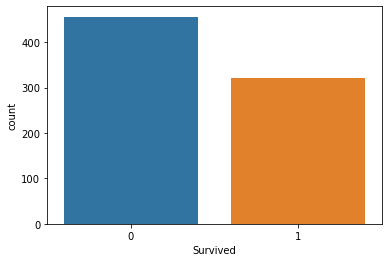

In [21]:
ax=sns.countplot(x="Survived", data=df)
print(df['Survived'].value_counts())

In [22]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.336811,-0.511844,-0.078239,-0.038018,0.069518,0.246927
Pclass,-0.336811,1.000000,0.117611,-0.338731,0.088784,0.040756,-0.551794
Sex,-0.511844,0.117611,1.000000,0.092571,-0.098019,-0.237349,-0.169542
Age,-0.078239,-0.338731,0.092571,1.000000,-0.280466,-0.187355,0.090394
SibSp,-0.038018,0.088784,-0.098019,-0.280466,1.000000,0.379961,0.133207
Parch,0.069518,0.040756,-0.237349,-0.187355,0.379961,1.000000,0.190250
Fare,0.246927,-0.551794,-0.169542,0.090394,0.133207,0.190250,1.000000


<AxesSubplot:>

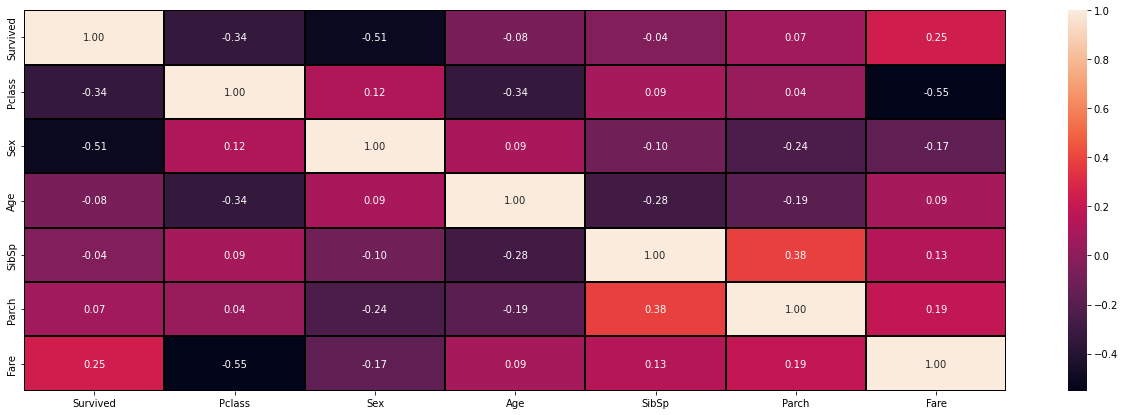

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")


In [24]:
corr_mat=df.corr()
corr_mat['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.246927
Parch       0.069518
SibSp      -0.038018
Age        -0.078239
Pclass     -0.336811
Sex        -0.511844
Name: Survived, dtype: float64

# DATA VISUALISATION

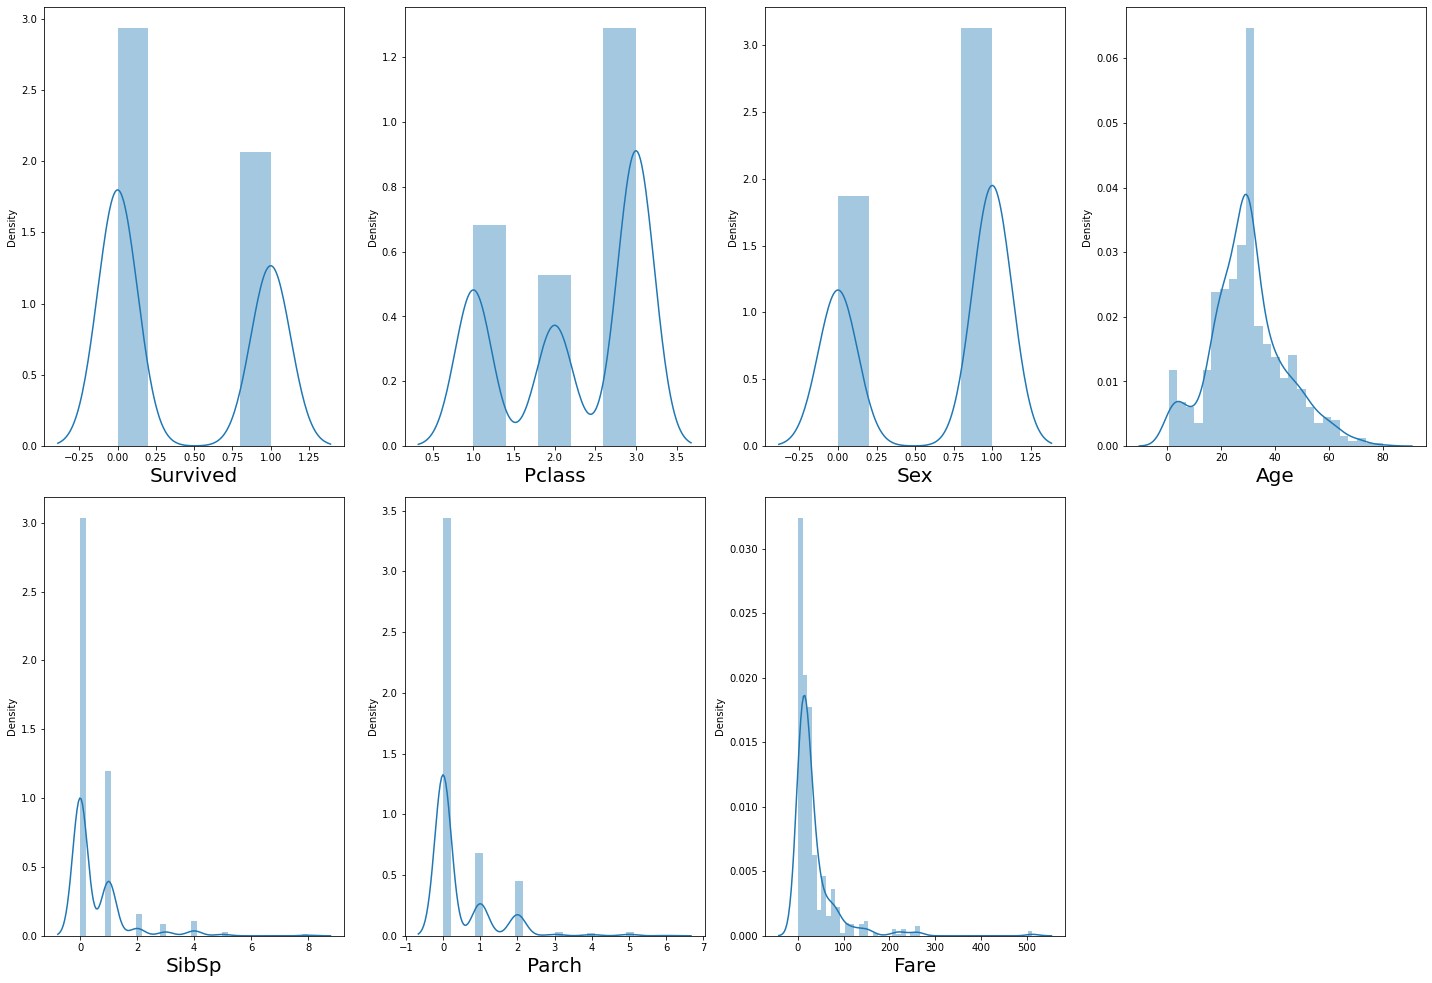

In [25]:
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [26]:
df.skew().sort_values(ascending=False)

Fare        4.553853
SibSp       3.040372
Parch       2.617726
Age         0.395824
Survived    0.353540
Pclass     -0.488069
Sex        -0.519529
dtype: float64

In [27]:
target_column = df['Survived']
target_column

0      0
1      1
2      1
3      1
4      0
      ..
772    0
773    1
774    0
775    1
776    0
Name: Survived, Length: 777, dtype: int64

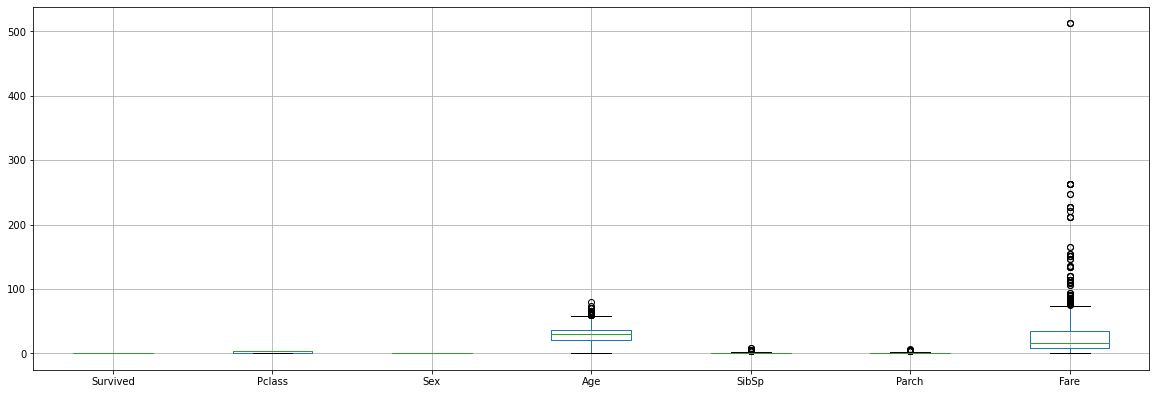

In [28]:
df.boxplot(figsize=[20,8]) 
plt.subplots_adjust(bottom=0.25)
plt.show()

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET

In [29]:
from sklearn.preprocessing import power_transform
df_new = power_transform(df)
df=pd.DataFrame(df_new,columns=df.columns)
df.skew().sort_values(ascending=False)

Parch       1.087425
SibSp       0.693420
Survived    0.353540
Age         0.015441
Fare       -0.040284
Pclass     -0.356836
Sex        -0.519529
dtype: float64

In [30]:
df['Survived'] = target_column
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
772    0
773    1
774    0
775    1
776    0
Name: Survived, Length: 777, dtype: int64

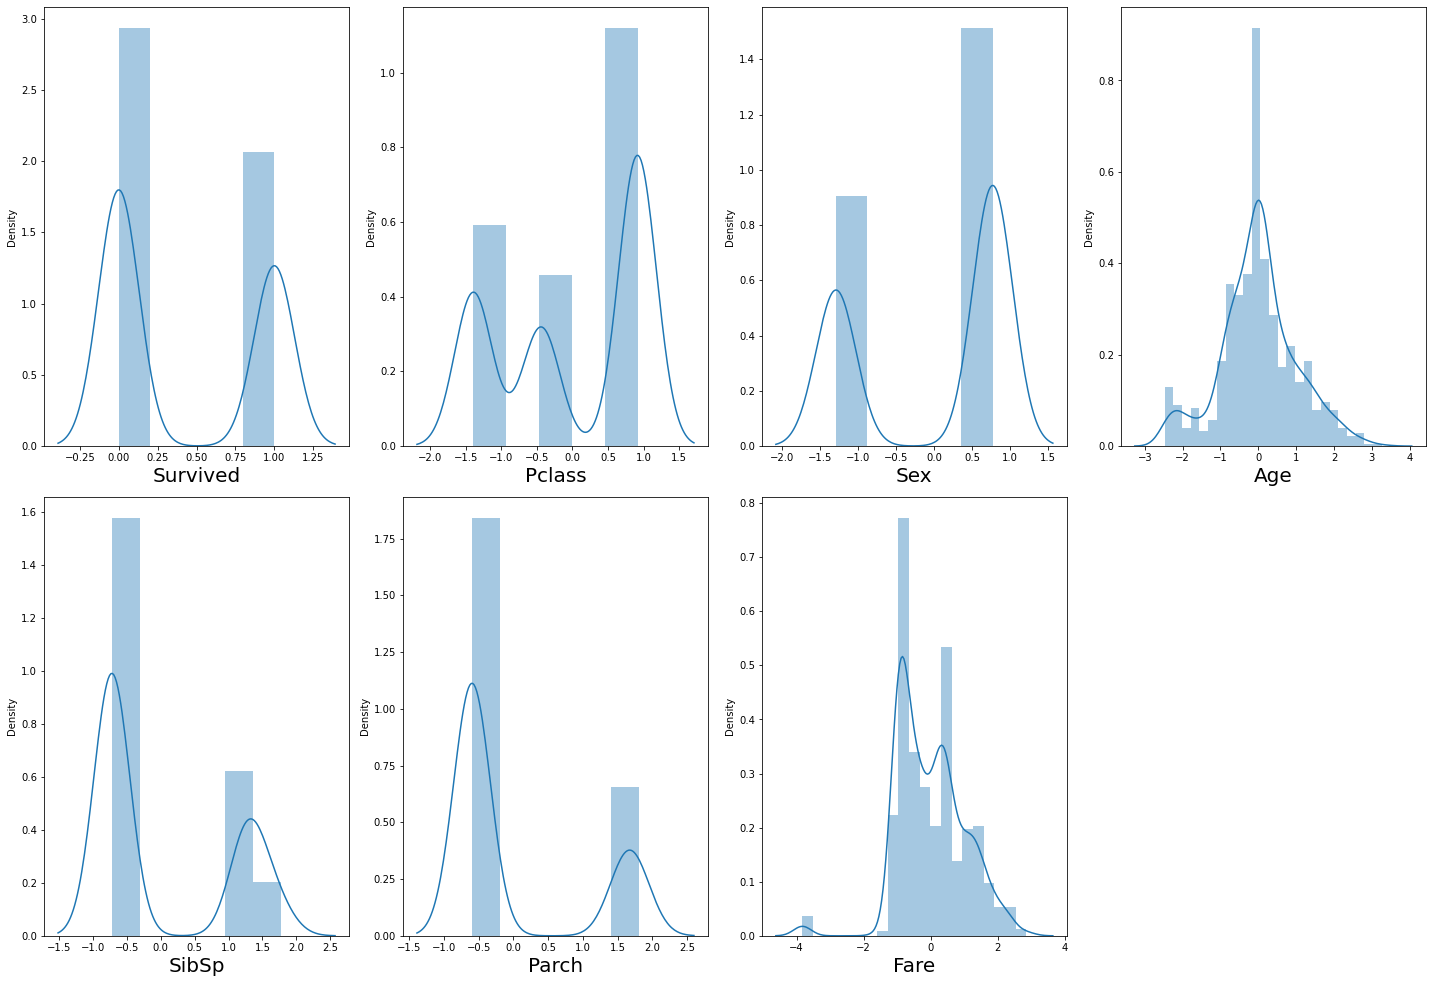

In [31]:
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

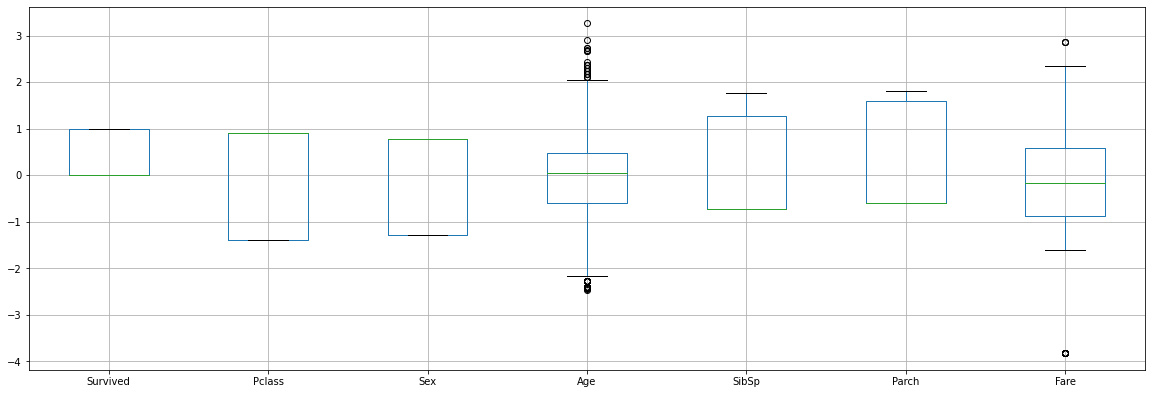

In [32]:
df.boxplot(figsize=[20,8]) 
plt.subplots_adjust(bottom=0.25)
plt.show()

In [33]:
from scipy.stats import iqr
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr = q3-q1

In [34]:
Age_high = (q3.Age+(1.5*iqr.Age))
index=np.where(df['Age']>Age_high)
df=df.drop(df.index[index])
df.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,0,0.914744,0.773799,-0.524407,1.279363,-0.596149,-0.992031
1,1,1,-1.390320,-1.292325,0.621501,1.279363,-0.596149,1.263485
2,2,1,0.914744,-1.292325,-0.225991,-0.719932,-0.596149,-0.899645
3,3,1,-1.390320,-1.292325,0.415277,1.279363,-0.596149,0.995210
4,4,0,0.914744,0.773799,0.415277,-0.719932,-0.596149,-0.883396
...,...,...,...,...,...,...,...,...
751,772,0,0.914744,-1.292325,0.689523,-0.719932,1.804297,0.423850
752,773,1,-1.390320,-1.292325,-0.755106,-0.719932,-0.596149,0.452734
753,774,0,0.914744,-1.292325,0.042107,1.279363,1.759456,0.210264
754,775,1,-1.390320,0.773799,-0.225991,-0.719932,-0.596149,0.452734


In [35]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
772    0
773    1
774    0
775    1
776    0
Name: Survived, Length: 756, dtype: int64

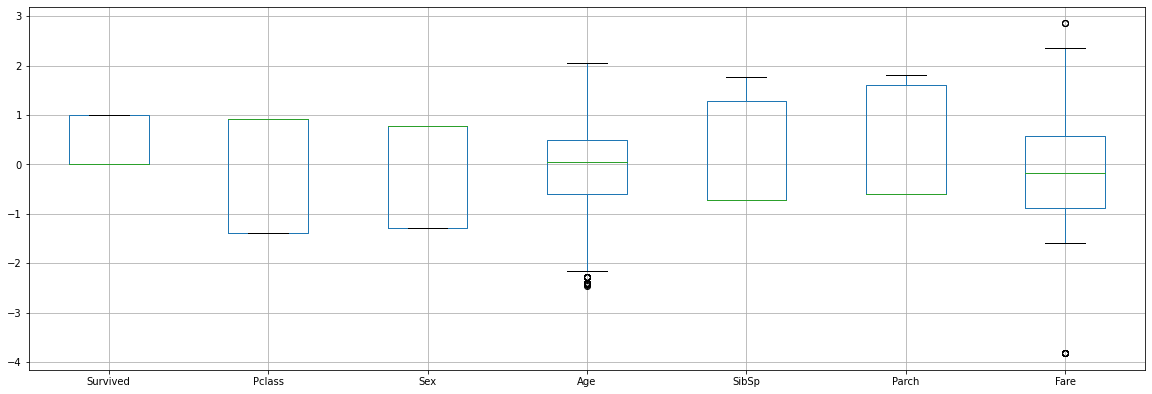

In [36]:
df.boxplot(figsize=[20,8])  
plt.subplots_adjust(bottom=0.25)
plt.show()

In [37]:
df.shape

(756, 7)

In [38]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [39]:
y=df['Survived']
X=df.drop(columns=['Survived'])

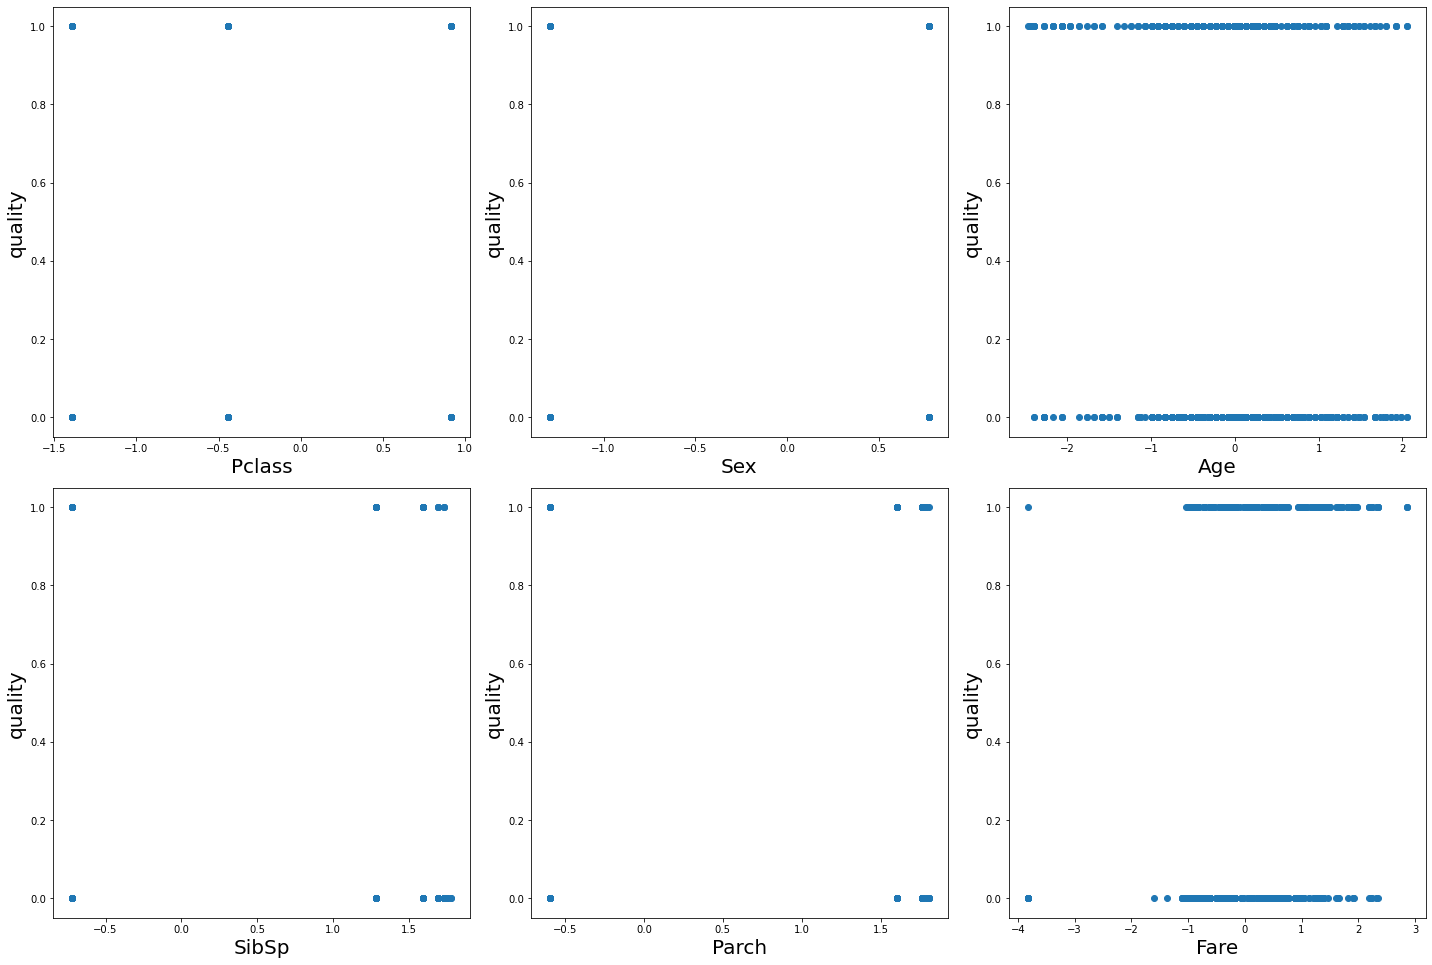

In [40]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=15: #double the features
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('quality', fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.8281938325991189 on Random State 44


In [43]:
x_train, x_test, y_train, y_test =  train_test_split(X_scaled, y, test_size=0.30, random_state=44)

# USING SMOTE FOR UPSAMPLING

In [44]:
conda install -c conda-forge imbalanced-learn


Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::babel==2.9.1=pyhd3eb1b0_0
  - defaults/osx-64::tqdm==4.64.0=py39hecd8cb5_0
  - defaults/noarch::conda-pack==0.6.0=pyhd3eb1b0_0
  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/noarch::python-slugify==5.0.2=pyhd3eb1b0_0
  - defaults/osx-64::scikit-learn==1.0.2=py39hae1ba45_1
  - defaults/noarch::arrow==1.2.2=pyhd3eb1b0_0
  - defaults/osx-64::mpmath==1.2.1=py39hecd8cb5_0
  - defaults/noarch::ptyprocess==0.7.0=pyhd3eb1b0_2
  - defaults/noarch::holoviews==1.14.8=pyhd3eb1b0_0
  - defaults/osx-64::tabulate==0.8.9=py39hecd8cb5_0
  - defaults/osx-64::anaconda-navigator==2.2.0=py39hecd8cb5_0
  - defaults/noarch::s3transfer==0.5.0=pyhd3eb1b0_0
  - defaults/noarch::jupyterlab_widgets==1.0.0=pyhd3eb1b0_1
  - defaults/noarch::yapf==0.31.0=pyhd3eb1b0_0
  - defaults/noarch::pkginfo==1.8.2=pyhd3eb1b0_0
  - defaults

In [50]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 82.81938325991189
[[113  15]
 [ 24  75]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       128
           1       0.83      0.76      0.79        99

    accuracy                           0.83       227
   macro avg       0.83      0.82      0.82       227
weighted avg       0.83      0.83      0.83       227



In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Accuracy 70.48458149779736
[[101  27]
 [ 40  59]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       128
           1       0.69      0.60      0.64        99

    accuracy                           0.70       227
   macro avg       0.70      0.69      0.69       227
weighted avg       0.70      0.70      0.70       227



In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_rf)*100)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy 80.61674008810573
[[116  12]
 [ 32  67]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       128
           1       0.85      0.68      0.75        99

    accuracy                           0.81       227
   macro avg       0.82      0.79      0.80       227
weighted avg       0.81      0.81      0.80       227



In [53]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_svc)*100)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))


Accuracy 80.61674008810573
[[125   3]
 [ 41  58]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       128
           1       0.95      0.59      0.72        99

    accuracy                           0.81       227
   macro avg       0.85      0.78      0.79       227
weighted avg       0.84      0.81      0.80       227



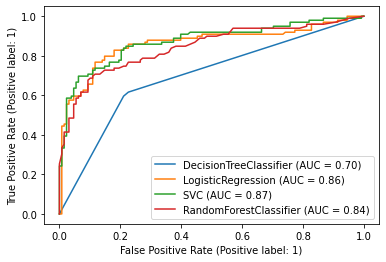

In [54]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.show()


In [55]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,X_scaled,y,cv=5)
print("Cross validation score of Logistic Regression Model", scr.mean())
scr2 = cross_val_score(rf,X_scaled,y,cv=5)
print("Cross validation score of Random Forest Model", scr2.mean())
scr3 = cross_val_score(dt,X_scaled,y,cv=5)
print("Cross validation score of Decision Tree Model", scr3.mean())
scr4 = cross_val_score(svc,X_scaled,y,cv=5)
print("Cross validation score of SVC Model", scr4.mean())

Cross validation score of Logistic Regression Model 0.7659201812478216
Cross validation score of Random Forest Model 0.7686214708957826
Cross validation score of Decision Tree Model 0.7315963750435692
Cross validation score of SVC Model 0.7897438131753224


In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C': np.arange(0.1,10,0.1),
              'gamma': np.arange(0.1,1,0.1)
             }
gridsearch = GridSearchCV(svc, param_grid)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 2.1, 'gamma': 0.1}

In [57]:
svc = SVC(C=1.1, gamma=0.5)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
cfm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       128
           1       0.90      0.64      0.75        99

    accuracy                           0.81       227
   macro avg       0.84      0.79      0.80       227
weighted avg       0.83      0.81      0.80       227



In [58]:
GCV = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred) 

0.7841409691629956

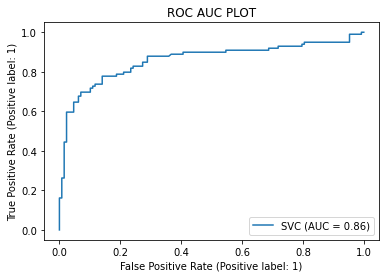

In [59]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC PLOT")
plt.show()

In [60]:
import joblib
joblib.dump(GCV.best_estimator_,"Titanic.pkl")

['Titanic.pkl']